# CGEM the Notebook

## Compile the code

In [104]:
!make

gfortran -o CGEM.exe    singledouble.o sw_adtg.o sw_ptmp.o sw_temp.o p80.o constants.o phsolvers.o varsolver.o depth2press.o rho.o rhoinsitu.o vars.o p2fCO2.o gasx.o model_dim.o cgem_vars.o Command_Line_Args.o date_time.o sgrid.o Calc_Chla.o DailyRad_init.o cgem.o SDM.o func_E.o func_Qs.o func_S.o func_T.o T_GoMDOM.o Nitrification.o rnitrate.o calc_Agrow.o reaction.o Q10_T.o MOD_UTILITIES.o calc_solar_zenith.o Light_GoMDOM.o Call_IOP_PAR.o main.o  


## Import CGEM Python functions

In [105]:
from cgem import *

## Try a plot
Options are:

A, Qn, Qp, Z, NO3, NH4, PO4, DIC, O2, OM1_A, OM2_A, OM1_Z, OM2_Z, OM1_R, OM2_R, CDOM, Si, Alk, Tr

Plotting CGEM variable Z


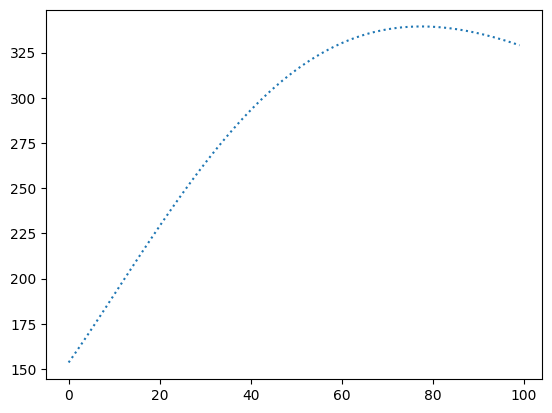

In [108]:
cgem_plot1D("Z")

## Write out the namelist

In [107]:
import f90nml
from opentea.noob.asciigraph import nob_asciigraph
nml = f90nml.read('cgem.nml')
nml_dict = nml.todict()
print(nob_asciigraph(nml_dict)) # show output

┣ simulation (OrderedDict)
┃  ┣ iyrs (int) : 2006
┃  ┣ imons (int) : 1
┃  ┣ idays (int) : 1
┃  ┣ ihrs (int) : 18
┃  ┣ imins (int) : 0
┃  ┣ isecs (int) : 0
┃  ┣ iyre (int) : 2006
┃  ┣ imone (int) : 12
┃  ┣ idaye (int) : 31
┃  ┣ ihre (int) : 18
┃  ┣ imine (int) : 0
┃  ┣ isece (int) : 0
┃  ┣ dt (int) : 3600
┃  ┣ lon_in (float) : -92.39
┃  ┣ lat_in (float) : 29.03
┃  ┣ depth_in (float) : 20.0
┃  ┗ rad_in (float) : 1.0
┣ switches (OrderedDict)
┃  ┣ which_fluxes (list)
┃  ┃    ┣ List item #0 (int) : 0
┃  ┃    ┣ List item #1 (int) : 0
┃  ┃    ┣ List item #2 (int) : 0
┃  ┃    ┣ List item #3 (int) : 0
┃  ┃    ┣ List item #4 (int) : 0
┃  ┃    ┣ List item #5 (int) : 0
┃  ┃    ┣ List item #6 (int) : 0
┃  ┃    ┗ List item #7 (int) : 0
┃  ┣ which_temperature (int) : 1
┃  ┣ which_uptake (int) : 1
┃  ┣ which_quota (int) : 1
┃  ┣ which_irradiance (int) : 1
┃  ┣ which_chlac (int) : 1
┃  ┣ which_photosynthesis (int) : 2
┃  ┗ which_growth (int) : 1
┣ optics (OrderedDict)
┃  ┣ kw (float) : 0.146
┃  ┣ kcdom